# Multilabel Classification

In multi-label classification, each sample can have multiple labels associated with it, as opposed to the traditional single-label classification where each sample can have only one label associated with it. <br/>

This means that the output of a multi-label classifier is an array of probabilities, one for each label, indicating the probability of the input sample belonging to each label.

# Setting Up

In [ ]:
!nvidia-smi

Fri Aug 11 15:38:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/resume-clf

/content/drive/MyDrive/resume-clf


# Data

In [ ]:
df = pd.read_csv("Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,"HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR Summary Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management. Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service. Highlights Focused on customer satisfaction Team management Marketing savvy Conflict resolution techniques Training and development Skilled multi-tasker Client relations specialist Accomplishments Missouri DOT Supervisor Trainin...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME500375979"" style=""\n padding-top:0px;\n ""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_500375979_1_326506904"" style=""\n padding-top:0px;\n ""> <div class=""name"" itemprop=""name""> <span class=""field fName"" id=""500375979FNAM1""> </span> <span> </span> <span class=""field"" id=""500375979LNAM1""> HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM500375981"" s...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS Summary Versatile media professional with background in Communications, Marketing, Human Resources and Technology. Experience 09/2015 to Current HR Specialist, US HR Operations Company Name － City , State Managed communication regarding launch of Operations group, policy changes and system outages Designed standard work and job aids to create comprehensive training program for new employees and contractors Audited job postings for old, pending, on-hold and draft positions. Audited...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME911808366"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_911808366_1_598530989"" style=""padding-top:0px;""> <div class=""name thinbottomborder"" itemprop=""name""> <span class=""field fName"" id=""911808366FNAM1""> </span> <span> </span> <span class=""field"" id=""911808366LNAM1""> HR SPECIALIST, US HR OPERATIONS</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM911808372"" style=""padding-top:0px;""> <div class=...",HR
2,33176873,"HR DIRECTOR Summary Over 20 years experience in recruiting, 15 plus years in Human Resources Executive Management, 5 years of HRIS development and maintenance 4 years working in a Healthcare Enviroment Skills Recruiting FMLA/EEO/FLSA HRIS Development Benefit Administration Policy Development Web Page Development Accomplishments Kansas Health Institute -Health Outcomes for the State of Kansas -1999 \nMemberships and Accolades: Project Management Institute Member, SHRM, Chamber of Commerce, 1999 Friends University President'...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME1008511259"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_1008511259_1_669264982"" style=""padding-top:0px;""> <div class=""name"" itemprop=""name""> <span class=""field"" id=""1008511259FNAM1""> </span> <span> </span> <span class=""field lName"" id=""1008511259LNAM1""> HR DIRECTOR</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM1008511268"" style=""padding-top:0px;""> <div class=""heading""> <div class=""sectionti...",HR
3,27018550,"HR SPECIALIST Summary Dedicated, Driven, and Dynamic with over 20 years of customer service expertise. Motivated to maintain customer satisfaction and contribute to company success with an emphasis in personnel and process management. Solid team player with proven ability to establish rapport with clients. Skills Type 50 wpm and 10-Key by touch Microsoft programs Word, Excel, Access, Outlook, PowerPoint Personnel ma

In [ ]:
df.shape

(2484, 4)

In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(2484, 4)

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Resume.csv")

# Print a few sample values from the "Category" column
sample_values = df['Category'].sample(n=5)  # Change the number to get more or fewer samples

for value in sample_values:
    print(value)


INFORMATION-TECHNOLOGY
HR
APPAREL
AGRICULTURE
BPO


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Resume.csv")

# Drop rows with missing values
df = df.dropna().reset_index(drop=True)

# Initialize a dictionary to count category occurrences
category_count = {}

# Iterate over the Category values
for category in df['Category']:
    if category in category_count:
        category_count[category] += 1
    else:
        category_count[category] = 1

print(f"Total number of unique categories: {len(category_count)}")
print(category_count)


Total number of unique categories: 24
{'HR': 110, 'DESIGNER': 107, 'INFORMATION-TECHNOLOGY': 120, 'TEACHER': 102, 'ADVOCATE': 118, 'BUSINESS-DEVELOPMENT': 120, 'HEALTHCARE': 115, 'FITNESS': 117, 'AGRICULTURE': 63, 'BPO': 22, 'SALES': 116, 'CONSULTANT': 115, 'DIGITAL-MEDIA': 96, 'AUTOMOBILE': 36, 'CHEF': 118, 'FINANCE': 118, 'APPAREL': 97, 'ENGINEERING': 118, 'ACCOUNTANT': 118, 'CONSTRUCTION': 112, 'PUBLIC-RELATIONS': 111, 'BANKING': 115, 'ARTS': 103, 'AVIATION': 117}


In [ ]:
df.tail()

,ID,Resume_str,Resume_html,Category
2479,99416532,"RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHARGE BRIGADE MAIL ROOM Summary Motivated logistics specialist, successful at managing inventory control, customer service and transportation logistics. Excellent problem solving and interpersonal skills. Managed and accounted for over $100 million of military munitions with zero errors. Monthly inventories of multiple warehouses. Reconciled daily issue and turn-in paperwork of customer units. Consistently recognized for excellence in that field. Successfully opened, developed and maintained a ...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME738316709"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_738316709_1_478330295"" style=""padding-top:0px;""> <div class=""name thinbottomborder"" itemprop=""name""> <span class=""field"" id=""738316709FNAM1""> </span> <span> </span> <span class=""field"" id=""738316709LNAM1""> RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHARGE BRIGADE MAIL ROOM</span> </div> <div class=""myGap""> </div> <div class=""lowerborder thinbottomborder"">...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGANIZATIONAL DEVELOPMENT DIRECTOR Professional Summary Strategically grounded, highly experienced leader* Quickly establishes trust and effective working relationships * Focus on effective communication between teams * Creative, articulate and resourceful * Successful at team mentoring and develop individuals into leadership *Innovative, energetic and a good sense of humor Skills Work History 01/2014 to Current Government Relations, Communications and Organizational Development Director Co...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME510479545"" style=""\n padding-top:0px;\n ""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_510479545_1_333318453""> <div class=""name"" itemprop=""name""> <span class=""field"" id=""510479545FNAM1""> </span> <span> </span> <span class=""field"" id=""510479545LNAM1""> GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGANIZATIONAL DEVELOPMENT DIRECTOR</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM510479549"" style=""\n padding-top...",AVIATION
2481,31605080,"GEEK SQUAD AGENT Professional Profile IT support specialist with experience across multiple disciplines including technical\nsupport, customer service, computer repair, and military service. I am hard working,\nwilling to learn, team oriented, and comfortable working independently as well. Qualifications Windows / Mac / IOS / Android Technical Support \nHardware & Software Maintenance User Training \nMalware Detection & Removal Customer Service \nEntry Level Active Directory & Ticketing Problem Solving & Research Experience Company Name ...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME927947889"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_927947889_1_609980872"" style=""padding-top:0px;""> <div class=""name bottomborder"" itemprop=""name""> <span class=""field"" id=""927947889FNAM1""> </span> <span> </span> <span class=""field"" id=""927947889LNAM1""> GEEK SQUAD AGENT</span> </div> <div class=""lowerborder bottomborder""> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM927947900"" style=""padding-t...",AVIATION
2482,21190805,"PROGRAM DIRECTOR / OFFICE MANAGER Summary Highly personable, tech savvy Professional with 9 plus years of experience in administrative and customer service roles including 5 years of non-profit experience. Demonstrated ability to develop and maintain relationships through dependability and exceptional service leading to increased repeat and refer

In [ ]:
encode_category_types = {key: idx for idx, (key, value) in enumerate(category_count.items())}
with open("category_types_encoded.json", "w") as fp:
    json.dump(encode_category_types, fp)


In [ ]:
categorical_category_list = []
Category_list = df['Category'].to_list()

for Category in Category_list:
    categorical_list = [0] * len(encode_category_types)

    # Assuming Category is a single category name string
    category_type_index = encode_category_types[Category]
    categorical_list[category_type_index] = 1

    categorical_category_list.append(categorical_list)

categorical_category_list[3][:23]


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df['category_cat_list'] = categorical_category_list
df.head()

,ID,Resume_str,Resume_html,Category,category_cat_list
0,16852973,"HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR Summary Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management. Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service. Highlights Focused on customer satisfaction Team management Marketing savvy Conflict resolution techniques Training and development Skilled multi-tasker Client relations specialist Accomplishments Missouri DOT Supervisor Trainin...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME500375979"" style=""\n padding-top:0px;\n ""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_500375979_1_326506904"" style=""\n padding-top:0px;\n ""> <div class=""name"" itemprop=""name""> <span class=""field fName"" id=""500375979FNAM1""> </span> <span> </span> <span class=""field"" id=""500375979LNAM1""> HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM500375981"" s...",HR,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,22323967,"HR SPECIALIST, US HR OPERATIONS Summary Versatile media professional with background in Communications, Marketing, Human Resources and Technology. Experience 09/2015 to Current HR Specialist, US HR Operations Company Name － City , State Managed communication regarding launch of Operations group, policy changes and system outages Designed standard work and job aids to create comprehensive training program for new employees and contractors Audited job postings for old, pending, on-hold and draft positions. Audited...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME911808366"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_911808366_1_598530989"" style=""padding-top:0px;""> <div class=""name thinbottomborder"" itemprop=""name""> <span class=""field fName"" id=""911808366FNAM1""> </span> <span> </span> <span class=""field"" id=""911808366LNAM1""> HR SPECIALIST, US HR OPERATIONS</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM911808372"" style=""padding-top:0px;""> <div class=...",HR,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,33176873,"HR DIRECTOR Summary Over 20 years experience in recruiting, 15 plus years in Human Resources Executive Management, 5 years of HRIS development and maintenance 4 years working in a Healthcare Enviroment Skills Recruiting FMLA/EEO/FLSA HRIS Development Benefit Administration Policy Development Web Page Development Accomplishments Kansas Health Institute -Health Outcomes for the State of Kansas -1999 \nMemberships and Accolades: Project Management Institute Member, SHRM, Chamber of Commerce, 1999 Friends University President'...","<div class=""fontsize fontface vmargins hmargins linespacing pagesize"" id=""document""> <div class=""section firstsection"" id=""SECTION_NAME1008511259"" style=""padding-top:0px;""> <div class=""paragraph PARAGRAPH_NAME firstparagraph"" id=""PARAGRAPH_1008511259_1_669264982"" style=""padding-top:0px;""> <div class=""name"" itemprop=""name""> <span class=""field"" id=""1008511259FNAM1""> </span> <span> </span> <span class=""field lName"" id=""1008511259LNAM1""> HR DIRECTOR</span> </div> </div> </div> <div class=""section"" id=""SECTION_SUMM1008511268"" style=""padding-top:0px;""> <div class=""heading""> <div class=""sectionti...",HR,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,27018550,"HR SPECIALIST Summary Dedicated, Driven, and Dynamic with over 20 years of customer service expertise. Motivated to maintain customer satisfaction and contribute to company suc

# Dataloaders and Modeling

In [ ]:
labels = list(encode_category_types.keys())

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('Resume_str'), get_y=ColReader('category_cat_list'), splitter=RandomSplitter(valid_pct=0.5, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-resume-classifier.pkl")

In [ ]:
# dls = torch.load("dataloaders/dls-multilabel-book-classifier.pkl")

In [ ]:
dls.vocab

['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE', 'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE', 'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE', 'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT', 'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION']

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"BARTENDER Experience Bartender , 05/2018 Company Name – City , State Marketing & Public Relations: 10 years, Maintain proper and adequate set-up of the bar on a daily basis. Responsible for maintaining stock, preparing and storing of all garnishes, juices and other perishables to ensure product quality. Attend stand ups prior to each function to obtain all details in order to execute each event flawlessly. Set up and breakdown all mobile bars per hotel standar",[PUBLIC-RELATIONS]
1,"PROJECT MANGER/LEAD SUPER Professional Summary Profile: A proven track record of over 21 years of experience as a General Construction Project Manager. Across extensive career, have directed & organized multi-million dollar Construction projects and renovations, optimized operations/profits for full scale projects, and overseen multi-trade Construction teams. I have a broad repertoire of skills in project management, estimating, planning, complex data & profit analysis, resourcing, or",[CONSTRUCTION]
2,"CHIEF SYSTEM ARCHITECT, SVP SYSTEM INTEGRATION Executive Profile Over 25 years technical experience with software, hardware, manufacturing, OEM, product development, project management integration, professional in many different industries: software, hardware, hybrid systems, storage and backup systems, media delivery systems, AV systems, semiconductor, advertising, IPTV/OTT, broadcast systems, commercial and industrial video systems, post production systems, security systems, contrac",[DIGITAL-MEDIA]
3,"LEVEL 2 CRITICAL PLATFORM SUPPORT ENGINEER Career Overview Over 7+ years of IT experience specializing in CLOUD/Aix/LINUX/Solaris and WINDOWS Administration in Production Support of various systems on AIX 5, 6.1, Linux (RedHat and SUSE). Strong background knowledge of Networking concepts and experience in Network Administration & Troubleshooting on AIX based systems. Experience in installation, configuration, tuning, security, backup, recovery and upgrades of IBM AIX. Experience in Install",[ADVOCATE]


In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage - 0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.00019054606673307717)

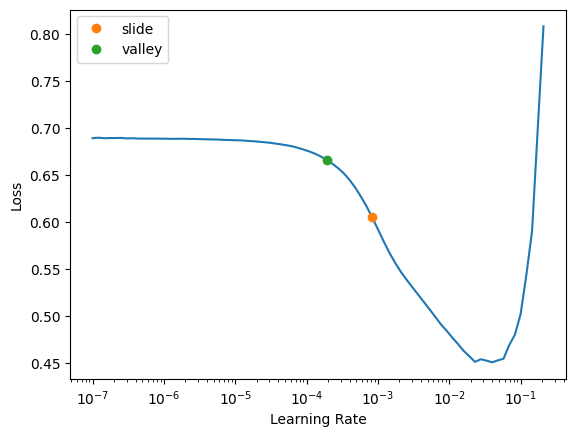

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(2,1.5e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.487995,0.252527,0.850778,00:28
1,0.287561,0.178421,0.958333,00:29


In [ ]:
learner.save("resume-classifier-stage-00")

Path('models/resume-classifier-stage-00.pth')

In [ ]:
learner.export("models/resume-classifier-stage-00.pkl")

# Stage - 1

In [ ]:
# learner.load("book-classifier-stage-0")

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.002511886414140463, valley=7.585775892948732e-05)

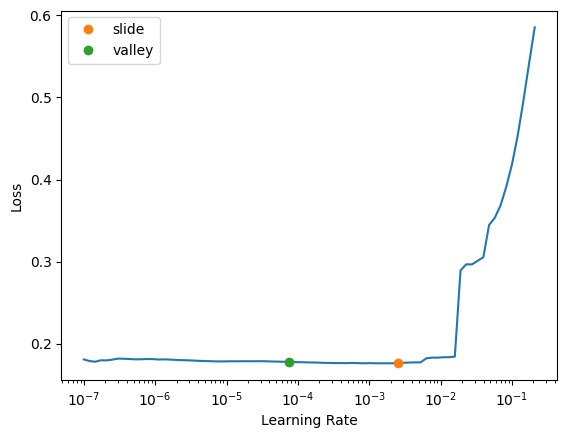

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
#learner.fit_one_cycle(3,slice(2.8e-4, 2.7e-5))


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.266582,0.282549,0.870885,03:40
1,0.249498,0.274961,0.871576,03:40
2,0.230604,0.258963,0.871722,03:39
3,0.206663,0.252315,0.875960,03:39
4,0.189388,0.246209,0.888069,03:39
5,0.172620,0.243560,0.885020,03:42
6,0.159215,0.242750,0.888679,03:38
7,0.155261,0.242017,0.889314,03:41
8,0.152586,0.241875,0.889972,03:42


In [ ]:
learner.fit_one_cycle(3, lr_max=slice(7.585775892948732e-05, 0.002511886414140463))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.166715,0.159502,0.936259,00:33
1,0.143093,0.121289,0.946055,00:34
2,0.120570,0.107359,0.951557,00:33


In [ ]:
learner.save("resume-classifier-stage-01")

Path('models/resume-classifier-stage-01.pth')

In [ ]:
learner.export("models/resume-classifier-stage-01.pkl")